# A Python Quick Start Tutorial
# Lesson \#1 : Data Types - <font color=red>SOLUTION</font>

## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [5]:
import math

math.sin(math.pi/2)

3.5**2

12.25

In [6]:
from math import sin,cos,radians

sigma_x = 12.0
sigma_y = -5.5
tau_xy  =  3.5

theta = radians(25.)

sx  = sigma_x * cos(theta)**2 + sigma_y * sin(theta)**2 + 2*tau_xy * sin(theta) * cos(theta)
sy  = sigma_x * sin(theta)**2 + sigma_y * cos(theta)**2 - 2*tau_xy * sin(theta) * cos(theta)
txy = (sigma_y - sigma_x) * sin(theta) * cos(theta) + tau_xy * (cos(theta)**2 - sin(theta)**2) 

In [7]:
print("sigma_x  = {:8.4f} ksi".format(sigma_x))
print("sigma_y  = {:8.4f} ksi".format(sigma_y))
print("tau_xy   = {:8.4f} ksi".format(tau_xy))

print("sigma_x' = {:8.4f} ksi".format(sx))
print("sigma_y' = {:8.4f} ksi".format(sy))
print("tau_xy'  = {:8.4f} ksi".format(txy))

sigma_x  =  12.0000 ksi
sigma_y  =  -5.5000 ksi
tau_xy   =   3.5000 ksi
sigma_x' =  11.5555 ksi
sigma_y' =  -5.0555 ksi
tau_xy'  =  -4.4531 ksi


### Exercise 2

Convert the calculation from exercise 1 to a function

In [8]:
def stressTransform(sigx, sigy, tauxy, theta):

    th = radians(theta)

    sx  = sigx * cos(th)**2 + sigy * sin(th)**2 + 2*tauxy * sin(th) * cos(th)
    sy  = sigx * sin(th)**2 + sigy * cos(th)**2 - 2*tauxy * sin(th) * cos(th)
    txy = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2) 
    
    return (sx,sy,txy)


Test your function for 

* $\theta=0$ (what should the result look like?)
* $\theta=25^\circ$
* $\theta=180^\circ$

In [9]:
stressTransform(sigma_x, sigma_y, tau_xy, 0)

(12.0, -5.5, 3.5)

In [10]:
stressTransform(sigma_x, sigma_y, tau_xy, 25)

(11.555547135673642, -5.055547135673642, -4.453132243388171)

In [11]:
stressTransform(sigma_x, sigma_y, tau_xy, 180)

(12.0, -5.499999999999999, 3.500000000000002)

In [12]:
stress=stressTransform(sigma_x, sigma_y, tau_xy, 25)

In [13]:
print(stress)

(11.555547135673642, -5.055547135673642, -4.453132243388171)


In [14]:
stress[0]

11.555547135673642

In [15]:
(a,b,c)=stressTransform(sigma_x, sigma_y, tau_xy, 25)

In [16]:
print(a)
print(b)
print(c)

11.555547135673642
-5.055547135673642
-4.453132243388171


In [28]:
template="sig_x = {:8.4f} ksi\nsig_y = {:8.4f} ksi\ntau   = {:8.4f} ksi"
print(template.format(*stress))

sig_x =  11.5555 ksi
sig_y =  -5.0555 ksi
tau   =  -4.4531 ksi


### Exercise 3

Let's use this function to study stress transformation.  In order to do so,

1. Create a list of 81 evenly spaced $\theta$-values from $0^\circ$ to $180^\circ$.
2. Compute the transformed stress for each of these values and collect the results in three lists: 

       sigmax_values = ...
       sigmay_values = ...
       tauxy_values = ...

3. print a nice table with 4 columns: $\theta$, $\sigma_x'$, $\sigma_y'$, $\tau_{xy}'$

In [31]:
sigmax_values = []
sigmay_values = []
tauxy_values = []


In [37]:
dth = 180./80.

th=[0.0]
for i in range(80):
    th.append(th[-1]+dth)

for theta in th:
    print(theta)

0.0
2.25
4.5
6.75
9.0
11.25
13.5
15.75
18.0
20.25
22.5
24.75
27.0
29.25
31.5
33.75
36.0
38.25
40.5
42.75
45.0
47.25
49.5
51.75
54.0
56.25
58.5
60.75
63.0
65.25
67.5
69.75
72.0
74.25
76.5
78.75
81.0
83.25
85.5
87.75
90.0
92.25
94.5
96.75
99.0
101.25
103.5
105.75
108.0
110.25
112.5
114.75
117.0
119.25
121.5
123.75
126.0
128.25
130.5
132.75
135.0
137.25
139.5
141.75
144.0
146.25
148.5
150.75
153.0
155.25
157.5
159.75
162.0
164.25
166.5
168.75
171.0
173.25
175.5
177.75
180.0


In [38]:
theta = []

print("       theta       sigma_x       sigma_y        tau_xy ")
print("=======================================================")

for i in range(81):
    th = i*180/80;
    
    theta.append(th)
    (sx,sy,tau) = stressTransform(sigma_x, sigma_y, tau_xy, th)
    sigmax_values.append(sx)
    sigmay_values.append(sy)
    tauxy_values.append(tau)

for item in zip(theta, sigmax_values, sigmay_values, tauxy_values):
    print("{:12.6f}, {:12.6f}, {:12.6f}, {:12.6f}".format(*item))

       theta       sigma_x       sigma_y        tau_xy 
    0.000000,    12.000000,    -5.500000,     3.500000
    2.250000,    12.247634,    -5.747634,     2.802694
    4.500000,    12.439794,    -5.939794,     2.088108
    6.750000,    12.575296,    -6.075296,     1.360648
    9.000000,    12.653304,    -6.153304,     0.624799
   11.250000,    12.673338,    -6.173338,    -0.114902
   13.500000,    12.635274,    -6.135274,    -0.853894
   15.750000,    12.539346,    -6.039346,    -1.587622
   18.000000,    12.386147,    -5.886147,    -2.311561
   20.250000,    12.176620,    -5.676620,    -3.021250
   22.500000,    11.912058,    -5.412058,    -3.712311
   24.750000,    11.594091,    -5.094091,    -4.380484
   27.000000,    11.224680,    -4.724680,    -5.021650
   29.250000,    10.806103,    -4.306103,    -5.631856
   31.500000,    10.340940,    -3.840940,    -6.207340
   33.750000,     9.832058,    -3.332058,    -6.744554
   36.000000,     9.282597,    -2.782597,    -7.240185
   38.250

### Exercise 4: Explore plotting in python

For this, check out https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py

I copied the demo code below so you can modify it to plot $(\sigma_{x}'/\tau_{xy}')$ and  $(\sigma_{y}'/-\tau_{xy}')$ curves from the data collected in `sigmax_values`, `sigmay_values`, `tauxy_values`

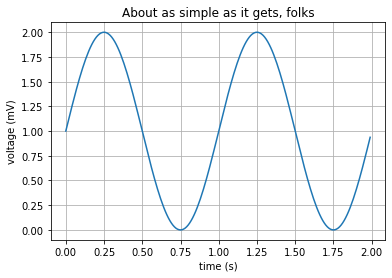

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

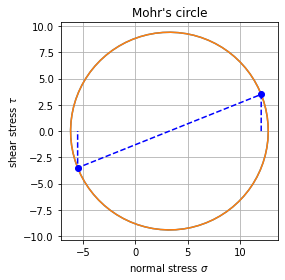

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

minus_tauxy_values = [ -x for x in tauxy_values ]

fig, ax = plt.subplots()
ax.plot(sigmax_values, tauxy_values)
ax.plot(sigmay_values, minus_tauxy_values)

# plot input data points

ax.plot(sigmax_values[0], tauxy_values[0],'ob')
ax.plot(sigmay_values[0], minus_tauxy_values[0],'ob')

# plot construction
constSigma = []
constTau   = []
constSigma.append(sigmax_values[0]),  constTau.append(0.0)
constSigma.append(sigmax_values[0]),  constTau.append(tauxy_values[0])
constSigma.append(sigmay_values[0]),  constTau.append(minus_tauxy_values[0])
constSigma.append(sigmay_values[0]),  constTau.append(0.0)

ax.plot(constSigma, constTau,'--b')


ax.set_xlabel('normal stress $\sigma$')
ax.set_ylabel('shear stress $\\tau$')
ax.set_title("Mohr's circle")
ax.grid()
ax.set_aspect("equal")

# I comment writing the figure to file ... makes this quicker
# fig.savefig("test.png")
plt.show()

**Remark**: This was just to wet your appetite! We will talk much more about `numpy` and `matplotlib` next week.

## Exercise 5: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[2]
        tau_xy  --> stress[3]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

Feel free to implement an alternative form of stressTrannsform() that looks like this:

In [ ]:
def stressTransform(stress, theta):
    # YOUR CODE
    # stress2 is a list or dictionary, just as stress is
    
    return stress2

## Homework questions

We can all learn from your questions!